## L-BFGS statistics tables and plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stats = pd.read_csv('statistics.csv', names = ['lambda', 'm', 'k', 'rel_error','gradient_norm'])
times = pd.read_csv('times.csv', names = ['lambda', 'm', 'exec_time'])

In [3]:
stats['log_rel_err'] = np.log10(stats['rel_error'])

In [4]:
stats = stats.drop(['rel_error', 'gradient_norm'], axis=1)
stats

,lambda,m,k,log_rel_err
0,1.000000e-10,3,0,0.000000
1,1.000000e-10,3,1,-0.000138
2,1.000000e-10,3,2,-0.003758
3,1.000000e-10,3,3,-0.327979
4,1.000000e-10,3,4,-0.460612
...,...,...,...,...
509,1.000000e+05,7,3,-13.045499
510,1.000000e+05,10,0,0.000000
511,1.000000e+05,10,1,-4.700788
512,1.000000e+05,10,2,-10.541333


In [7]:
times

,lambda,m,exec_time
0,1.000000e-10,3,0.202232
1,1.000000e-10,5,0.457967
2,1.000000e-10,7,0.169782
3,1.000000e-10,10,0.126458
4,1.000000e-05,3,0.324135
5,1.000000e-05,5,0.317997
6,1.000000e-05,7,0.171440
7,1.000000e-05,10,0.120465
8,1.000000e-02,3,0.311215
9,1.000000e-02,5,0.279539


In [10]:
idx = stats.groupby(['lambda', 'm'])['k'].idxmax()
overall_stats = stats.loc[idx]

overall_stats.index = range(0, len(overall_stats))
overall_stats['exec_time'] = times['exec_time']

overall_stats

,lambda,m,k,log_rel_err,exec_time
0,1.000000e-10,3,35,-12.067239,0.202232
1,1.000000e-10,5,52,-12.130513,0.457967
2,1.000000e-10,7,17,-12.352949,0.169782
3,1.000000e-10,10,11,-12.459333,0.126458
4,1.000000e-05,3,47,-12.258231,0.324135
5,1.000000e-05,5,39,-12.308634,0.317997
6,1.000000e-05,7,18,-12.347475,0.171440
7,1.000000e-05,10,11,-12.459854,0.120465
8,1.000000e-02,3,24,-12.337621,0.311215
9,1.000000e-02,5,59,-12.359061,0.279539


In [11]:
latex_table = overall_stats.to_latex(index=False)

with open('overall_stats_bfgs.tex', 'w') as f:
    f.write(latex_table)

C:\Users\Domenico\AppData\Local\Temp\ipykernel_3704\1310847909.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = overall_stats.to_latex(index=False)


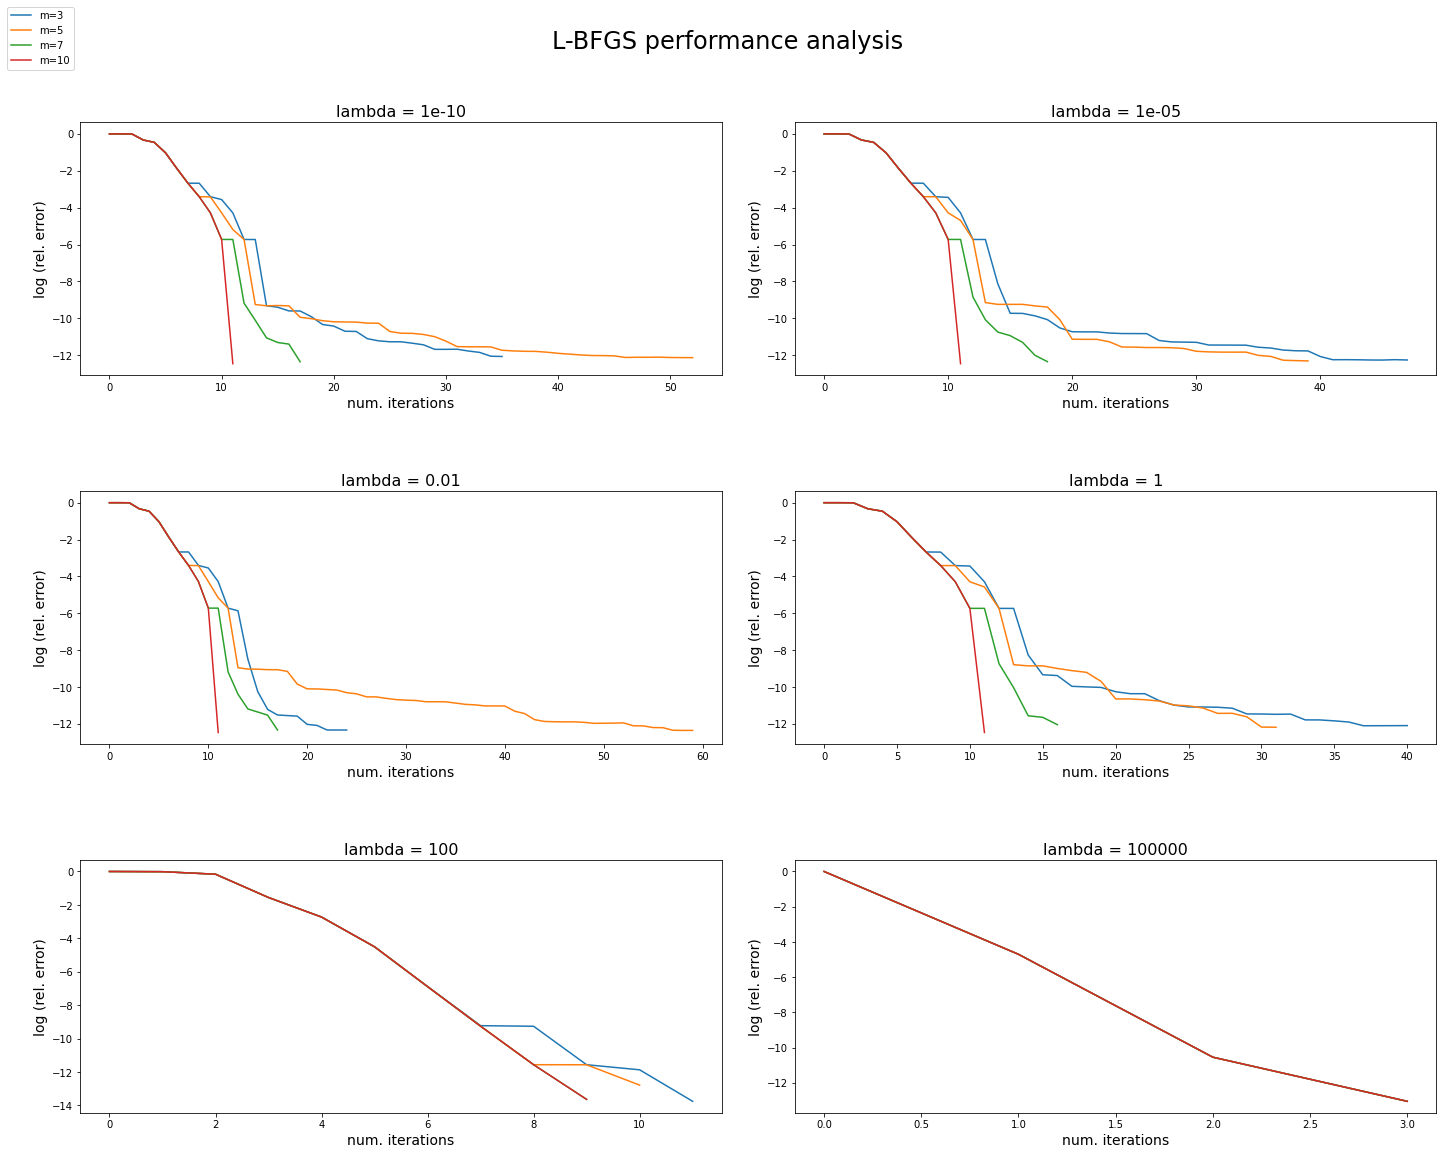

In [13]:
lambda_values = [1e-10, 1e-5, 0.01, 1, 100, 100000]
m_values = [3, 5, 7, 10]

fig, axs = plt.subplots(3,2, figsize = (20,16))

fig.suptitle('L-BFGS performance analysis', fontsize = 24)

for index, lambda_ in enumerate(lambda_values):
    for m in m_values:
        selected_vals = stats[(stats['m']== m) & (stats['lambda']==lambda_)]
        x = selected_vals['k'].to_numpy()
        y = selected_vals['log_rel_err'].to_numpy()
        axs[int(index/2), index%2].plot(x, y)
        axs[int(index/2), index%2].set_title(('\n\n\nlambda = ' + str(lambda_)), fontsize= 16)
    axs[int(index/2), index%2].set_xlabel("num. iterations", fontsize= 14)
    axs[int(index/2), index%2].set_ylabel("\nlog (rel. error)", fontsize= 14)

fig.legend([('m='+str(m)) for m in m_values], loc='upper left', bbox_to_anchor=(0, 1), borderaxespad=0.)

plt.tight_layout()
